In [10]:
import numpy as np
from collections import defaultdict
data = np.loadtxt('ls_hist/final_params.txt')

# checking between indices 0 and 1600
data = data[:,1]
data = data[1600:3200]

value_to_indices = defaultdict(list)
for idx, val in enumerate(data):
    value_to_indices[val].append(idx)

# Filter to only duplicated values
duplicates = {val: idxs for val, idxs in value_to_indices.items() if len(idxs) > 1}

for val, idxs in duplicates.items():
    print(f"Value {val} is duplicated at indices {idxs}")

Value 0.9458372497203081 is duplicated at indices [0, 100]
Value 0.9548842595169728 is duplicated at indices [1, 101]
Value 0.9492201686860534 is duplicated at indices [2, 102]
Value 0.960673798140027 is duplicated at indices [3, 103]
Value 0.9602974398833425 is duplicated at indices [4, 104]
Value 0.9513528206798438 is duplicated at indices [5, 105]
Value 0.9557055935262595 is duplicated at indices [6, 106]
Value 0.958798127141605 is duplicated at indices [7, 107]
Value 0.9585646860625141 is duplicated at indices [8, 108]
Value 0.9584659517713804 is duplicated at indices [9, 109]
Value 0.9549087060904026 is duplicated at indices [10, 110]
Value 0.9463678594289332 is duplicated at indices [11, 111]
Value 0.9556223552569459 is duplicated at indices [12, 112]
Value 0.957169119637012 is duplicated at indices [13, 113]
Value 0.9604101149955963 is duplicated at indices [14, 114]
Value 0.9566128647486718 is duplicated at indices [15, 115]
Value 0.9686556900377219 is duplicated at indices [16

Params (pbe):
[0.97007804 1.80402417]
Params (b3lyp):
[0.96430124 1.81517696]
Params (lda):
[0.98917883 1.79460847]
Params (rhf):
[0.94316008 1.83758782]
Loaded Hessian from: hessian/pbe.dat
Hessian (pbe):
ParameterHessian
  hessian:
    3.638470 0.126363 
    0.126363 0.161767 
  Conjugate directions:
    Lambda     Direction
    3.643057   +0.999342 +0.036274 
    0.157180   -0.036274 +0.999342 
Loaded Hessian from: hessian/b3lyp.dat
Hessian (b3lyp):
ParameterHessian
  hessian:
    3.797449 0.122413 
    0.122413 0.166389 
  Conjugate directions:
    Lambda     Direction
    3.801571   +0.999433 +0.033656 
    0.162266   -0.033656 +0.999433 
Loaded Hessian from: hessian/lda.dat
Hessian (lda):
ParameterHessian
  hessian:
    3.329216 0.122131 
    0.122131 0.155180 
  Conjugate directions:
    Lambda     Direction
    3.333909   +0.999263 +0.038393 
    0.150488   -0.038393 +0.999263 
Loaded Hessian from: hessian/rhf.dat
Hessian (rhf):
ParameterHessian
  hessian:
    4.512801 0.109580

/home/nils/anaconda3/envs/qmc_env/lib/python3.10/site-packages/stalk/pls/TargetParallelLineSearch.py:171: UserWarning: Already optimized, use reoptimize = True to reoptimize.
  warnings.warn('Already optimized, use reoptimize = True to reoptimize.')


  Optimization complete:
       d    target     error  rel.  
       0    0.0119    0.0076 64.096% 
       1    0.0113    0.0061 54.181% 
       p    target     error  rel.  
       0    0.0100    0.0077 76.829% 
       1    0.0100    0.0063 63.218% 
Surrogate model (pbe)
TargetParallelLineSearch
  Line-searches:
    #0  #0 TargetLineSearch
         offset     value     error 
        -0.5607  -13.9267         - 
        -0.4806  -15.4115         - 
        -0.4005  -16.2368         - 
        -0.3204  -16.6937         - 
        -0.2403  -16.9406         - 
        -0.1602  -17.0665         - 
        -0.0801  -17.1219         - 
         0.0000  -17.1361         - 
         0.0801  -17.1264         - 
         0.1602  -17.1033         - 
         0.2403  -17.0734         - 
         0.3204  -17.0405         - 
         0.4005  -17.0070         - 
         0.4806  -16.9741         - 
         0.5607  -16.9426         - 
      Fit: pf3, N: 200, fraction: 0.025, sgn: 1
      x0:   -0.04

/home/nils/anaconda3/envs/qmc_env/lib/python3.10/site-packages/dill/_dill.py:422: PicklingWarning: Cannot locate reference to <class 'stalk.pls.TargetParallelLineSearch.TargetParallelLineSearch'>.
  StockPickler.save(self, obj, save_persistent_id)
/home/nils/anaconda3/envs/qmc_env/lib/python3.10/site-packages/dill/_dill.py:422: PicklingWarning: Cannot locate reference to <class 'stalk.params.PesFunction.PesFunction'>.
  StockPickler.save(self, obj, save_persistent_id)
/home/nils/anaconda3/envs/qmc_env/lib/python3.10/site-packages/dill/_dill.py:422: PicklingWarning: Cannot locate reference to <class 'stalk.params.ParameterStructure.ParameterStructure'>.
  StockPickler.save(self, obj, save_persistent_id)
/home/nils/anaconda3/envs/qmc_env/lib/python3.10/site-packages/dill/_dill.py:422: PicklingWarning: Cannot locate reference to <class 'stalk.params.Parameter.Parameter'>.
  StockPickler.save(self, obj, save_persistent_id)
/home/nils/anaconda3/envs/qmc_env/lib/python3.10/site-packages/dill

  Optimization complete:
       d    target     error  rel.  
       0    0.0113    0.0075 66.198% 
       1    0.0108    0.0058 53.378% 
       p    target     error  rel.  
       0    0.0100    0.0076 75.774% 
       1    0.0100    0.0059 58.694% 
Surrogate model (b3lyp)
TargetParallelLineSearch
  Line-searches:
    #0  #0 TargetLineSearch
         offset     value     error 
        -0.5547  -13.9650         - 
        -0.4755  -15.4349         - 
        -0.3962  -16.2561         - 
        -0.3170  -16.7128         - 
        -0.2377  -16.9607         - 
        -0.1585  -17.0876         - 
        -0.0792  -17.1438         - 
         0.0000  -17.1582         - 
         0.0792  -17.1482         - 
         0.1585  -17.1244         - 
         0.2377  -17.0935         - 
         0.3170  -17.0592         - 
         0.3962  -17.0241         - 
         0.4755  -16.9896         - 
         0.5547  -16.9563         - 
      Fit: pf3, N: 200, fraction: 0.025, sgn: 1
      x0:   -0.

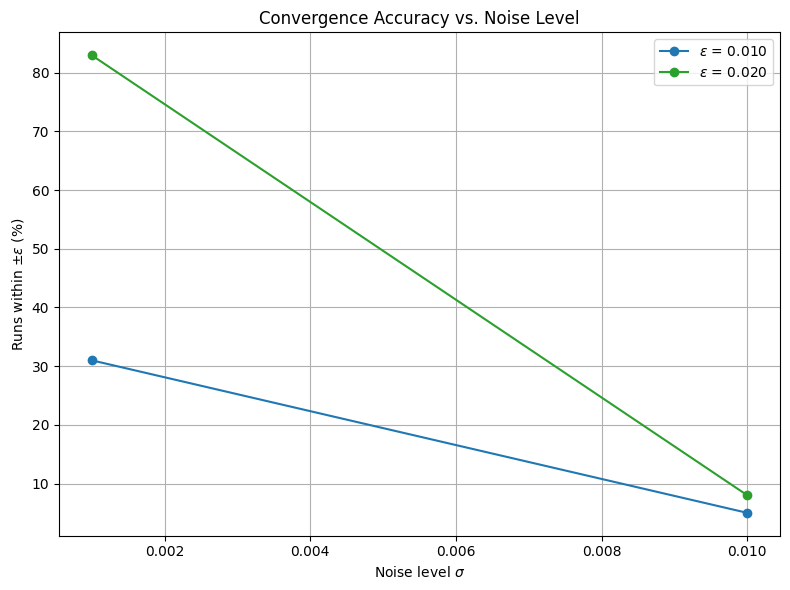

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


from params import pes_dict, co_dict, b3lyp_sigma_dict
from run2_surrogate import surrogates

# Load the parameter data
data = np.loadtxt('ls_hist/final_params.txt')  # assumes shape (num_total_runs, num_cols)

# Epsilon tolerances for [param0, param1]
epsilon_p = [[0.01, 0.01], [0.02, 0.02]]
epsilon_colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
sigmas = [0.010, 0.001]

xc_ls = 'b3lyp'
ref_params = surrogates[xc_ls].structure.params  # reference parameters

# Preallocate result array: shape (len(epsilon_p), len(sigmas))
success_percentages = np.zeros((len(epsilon_p), len(sigmas)))

i = 0
for xc_srg in pes_dict:
    for id1, eps in enumerate(epsilon_p):
        eps0, eps1 = eps
        for id2, sig in enumerate(sigmas):
            # Extract 100 runs for this setting
            runs = data[i*100:(i+1)*100]
            par0_res = runs[:, 1]
            par1_res = runs[:, 2]

            # Check if each run is within ±epsilon for both parameters
            within_bounds = (
                (np.abs(par0_res - ref_params[0]) <= eps0) &
                (np.abs(par1_res - ref_params[1]) <= eps1)
            )

            percent_within = 100 * np.sum(within_bounds) / len(within_bounds)
            success_percentages[id1, id2] = percent_within

            i += 1

i = 32

# Plot results
plt.figure(figsize=(8, 6))
for id1, eps in enumerate(epsilon_p):
    label = rf'$\epsilon$ = {eps[0]:.5f}'
    plt.plot(sigmas, success_percentages[id1], marker='o', label=label, color=epsilon_colors[id1])

plt.xlabel(r'Noise level $\sigma$')
plt.ylabel(r'Runs within $\pm \epsilon$ (%)')
plt.title('Convergence Accuracy vs. Noise Level')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


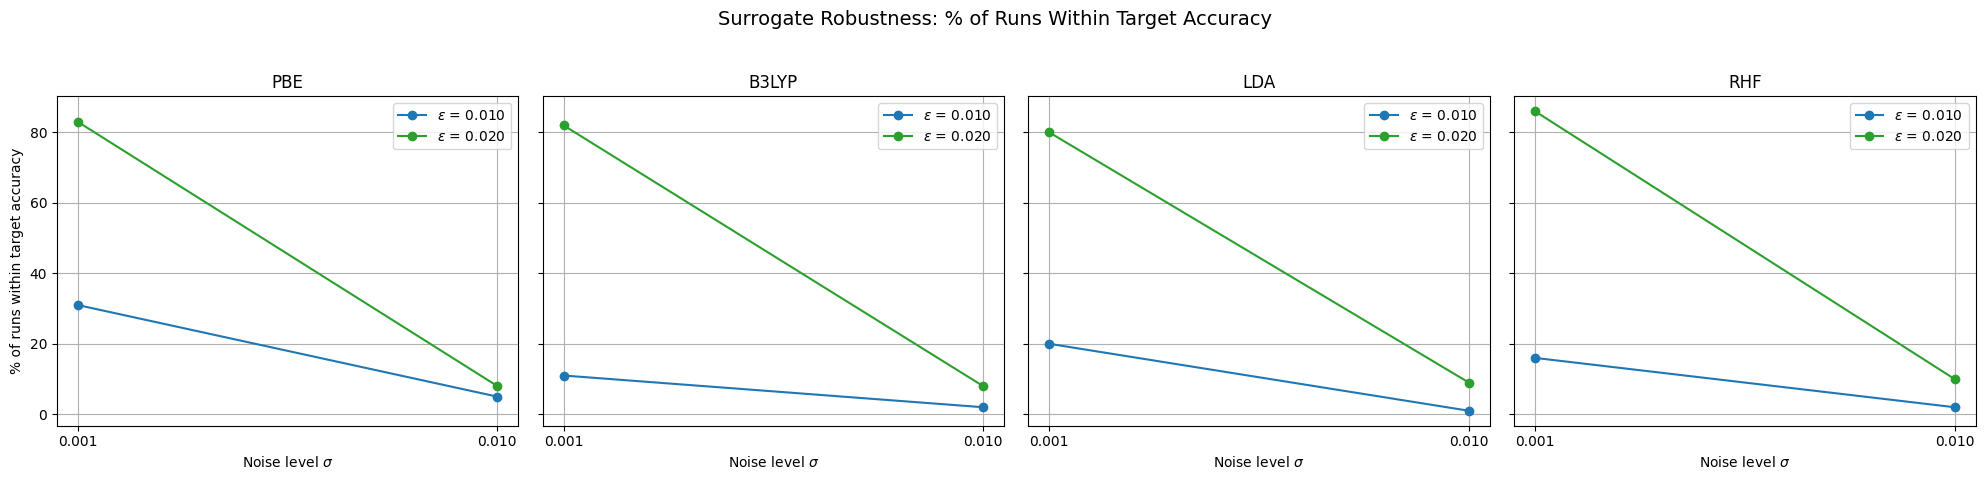

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the parameter data
data = np.loadtxt('ls_hist/final_params.txt')  # shape: (num_surrogates * len(epsilons) * len(sigmas) * 100, N_cols)

# Reference surrogate used for target parameters
xc_ls = 'b3lyp'
ref_params = surrogates[xc_ls].structure.params

# List of surrogates used
surrogate_names = list(pes_dict.keys())  # e.g. ['rhf', 'lda', 'pbe', 'b3lyp']

# Settings
epsilon_p = [[0.01, 0.01], [0.02, 0.02]]
epsilon_colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
sigmas = [0.010, 0.001]

# Result: shape (n_surrogates, len(epsilon_p), len(sigmas))
n_srg = len(surrogate_names)
success_percentages = np.zeros((n_srg, len(epsilon_p), len(sigmas)))

i = 0  # index into data (100 runs per setting)
for s_idx, xc_srg in enumerate(surrogate_names):
    for eps_idx, eps in enumerate(epsilon_p):
        eps0, eps1 = eps
        for sig_idx, sig in enumerate(sigmas):
            runs = data[i*100:(i+1)*100]
            par0_res = runs[:, 1]
            par1_res = runs[:, 2]

            # Check convergence within ±epsilon for both parameters
            within_bounds = (
                (np.abs(par0_res - ref_params[0]) <= eps0) &
                (np.abs(par1_res - ref_params[1]) <= eps1)
            )
            percent_within = 100 * np.sum(within_bounds) / len(within_bounds)
            success_percentages[s_idx, eps_idx, sig_idx] = percent_within
            i += 1

# Plotting
fig, axs = plt.subplots(1, n_srg, figsize=(5 * n_srg, 5), sharey=True)
fig.suptitle('Surrogate Robustness: % of Runs Within Target Accuracy', fontsize=14)

for s_idx, xc_srg in enumerate(surrogate_names):
    ax = axs[s_idx] if n_srg > 1 else axs
    for eps_idx, eps in enumerate(epsilon_p):
        label = rf'$\epsilon$ = {eps[0]:.3f}'
        ax.plot(
            sigmas,
            success_percentages[s_idx, eps_idx],
            marker='o',
            label=label,
            color=epsilon_colors[eps_idx]
        )

    ax.set_title(xc_srg.upper())
    ax.set_xlabel(r'Noise level $\sigma$')
    if s_idx == 0:
        ax.set_ylabel('% of runs within target accuracy')
    ax.set_xticks(sigmas)
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


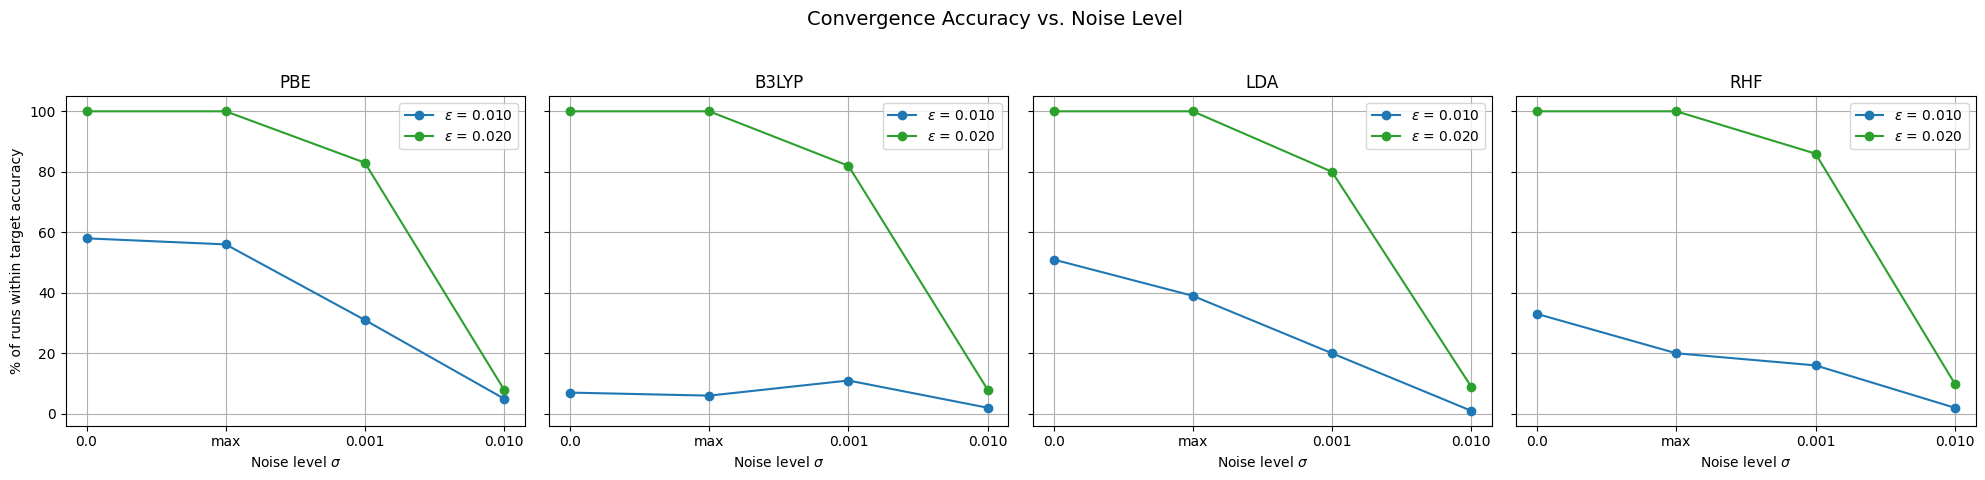

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the full file
data = np.loadtxt('ls_hist/final_params.txt')

# Settings
epsilon_p = [[0.01, 0.01], [0.02, 0.02]]
epsilon_colors = ['tab:blue', 'tab:green']
sigmas = [0.0, 0.001, 0.010, 'max sigma']  # Four values
sigma_labels = ['0.0', 'max', '0.001', '0.010']

xc_ls = 'b3lyp'
ref_params = surrogates[xc_ls].structure.params
surrogate_names = list(pes_dict.keys())

n_srg = len(surrogate_names)
n_eps = len(epsilon_p)
n_sig = len(sigmas)

# Preallocate result array
success_percentages = np.zeros((n_srg, n_eps, n_sig))

# --- First part: σ = 0.010 and 0.001, in lines 0 to 1599
i = 0
for s_idx in range(n_srg):
    for eps_idx in range(n_eps):
        for sig_idx, sig in enumerate([0.010, 0.001]):  # Only these 2 for now
            runs = data[i*100:(i+1)*100]
            par0_res = runs[:, 1]
            par1_res = runs[:, 2]
            eps0, eps1 = epsilon_p[eps_idx]
            within = (
                (np.abs(par0_res - ref_params[0]) <= eps0) &
                (np.abs(par1_res - ref_params[1]) <= eps1)
            )
            percent_within = 100 * np.sum(within) / len(within)
            # Place results at sig_idx = 2, 1 (i.e., map 0.010 → idx 2, 0.001 → idx 1)
            actual_sig_idx = {0.010: 3, 0.001: 2}[sig]
            success_percentages[s_idx, eps_idx, actual_sig_idx] = percent_within
            i += 1

# --- Second part: σ = 0.0 and max sigma, in lines 3200 to 4799
i = 32  # block index starting at 3200
for s_idx in range(n_srg):
    for eps_idx in range(n_eps):
        for sig_idx, sig in enumerate([0.0, 'max sigma']):  # only these 2
            runs = data[i*100:(i+1)*100]
            par0_res = runs[:, 1]
            par1_res = runs[:, 2]
            eps0, eps1 = epsilon_p[eps_idx]
            within = (
                (np.abs(par0_res - ref_params[0]) <= eps0) &
                (np.abs(par1_res - ref_params[1]) <= eps1)
            )
            percent_within = 100 * np.sum(within) / len(within)
            # Place results at sig_idx = 0 (0.0) or 3 (max sigma)
            actual_sig_idx = {0.0: 0, 'max sigma': 1}[sig]
            success_percentages[s_idx, eps_idx, actual_sig_idx] = percent_within
            i += 1

# --- Plotting
fig, axs = plt.subplots(1, n_srg, figsize=(5 * n_srg, 5), sharey=True)
fig.suptitle('Convergence Accuracy vs. Noise Level', fontsize=14)

for s_idx, xc_srg in enumerate(surrogate_names):
    ax = axs[s_idx] if n_srg > 1 else axs
    for eps_idx, eps in enumerate(epsilon_p):
        label = rf'$\epsilon$ = {eps[0]:.3f}'
        ax.plot(
            range(n_sig),
            success_percentages[s_idx, eps_idx],
            marker='o',
            label=label,
            color=epsilon_colors[eps_idx]
        )

    ax.set_title(xc_srg.upper())
    ax.set_xlabel(r'Noise level $\sigma$')
    if s_idx == 0:
        ax.set_ylabel('% of runs within target accuracy')
    ax.set_xticks(range(n_sig))
    ax.set_xticklabels(sigma_labels)
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [4]:
from params import pes_dict
xc_srg, pes_srg = pes_dict['b3lyp']
print(xc_srg)

TypeError: cannot unpack non-iterable PesFunction object